### Decision Trees Example 4.2
We perform cost-complexity pruning to the **heart** data set. The function **cv.tree* in the **tree**-package provides the implementation of cross-validation for choosing an optimal value of $\alpha$. The function returns a list that contains the vectors

-  **path** is the vector of those $\alpha$ values, where changes in $T_\alpha$ occur
-  **score** contains the corresponding averaged classification accuracies
-  **node** is the vector containing the corresponding tree sizes. 

The following code computes a large tree and performs cost-complexity pruning where the parameter $\alpha$ is chosen by $10$-fold cross-validation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)
df['ChestPain'], ChestPain_codes = pd.factorize(df['ChestPain'])
df['Thal'], Thal_codes = pd.factorize(df['Thal'])
# Drop NA rows:
df.dropna(inplace=True)
df.reset_index(inplace=True) # After removing NA

# Split in test-train
np.random.seed(2)
i = df.index
# Index of train
i_train = np.random.choice(i, replace=False, size=int(250))

# Save DataFrames
df_train = df.iloc[i_train]
df_test = df.drop(i_train)

# Define x and y
y_train = df_train['AHD_Yes']
y_test = df_test['AHD_Yes']
X_train = df_train.drop(columns=['AHD_Yes'])
X_test = df_test.drop(columns=['AHD_Yes'])

# Create and fit Decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  min_samples_split=10, 
                                  min_samples_leaf=5, 
                                  min_impurity_decrease=0.005)

path = clf.cost_complexity_pruning_path(X_train, y_train)

We finally compare the classification error rate of the training set with the cross-validated error. Below these two errors are plotted against the number of nodes in the tree (tree size). It becomes obvious that the training error shrinks to zero as the complexity of the tree increases whereas the cross-validated value has a minimum for the tree above with $12$ terminal nodes.

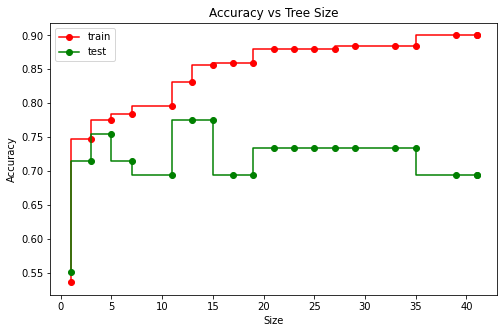

In [2]:
# Find misclasses and size of respective Trees T(alpha)
# Train:
node = []
score_train, score_test = [], []

for alpha in path.ccp_alphas:
    # Create and fit Decision tree classifier
    clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                      min_samples_split=10, 
                                      min_samples_leaf=5, 
                                      min_impurity_decrease=0.005, 
                                      ccp_alpha=alpha)
    clf = clf.fit(X_train, y_train) 
    # Save node count:
    node.append(clf.tree_.node_count)
    # Save Scores
    score_train.append(clf.score(X_train, y_train))
    score_test.append(clf.score(X_test, y_test))
    
# Plot Score vs Size
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(node, score_train, 
        'r-o', drawstyle="steps-post", label='train')
ax.plot(node, score_test, 
        'g-o', drawstyle="steps-post", label='test')
ax.set_xlabel("Size")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Tree Size")
plt.legend()
plt.show()